# A straightforward example

This is a simple example of how to generate a model for spiderman, here, we will generate a model that was fit to WASP-43

First, import the module

In [2]:
import spiderman as sp

Now we need to generate a parameter instance and choose a *brightness model* for the planet surface. In this example we will use the analytical formula given in Zhang and Showman 2016

In [3]:
spider_params = sp.ModelParams(brightness_model='xi')

All the model parameters are stored in this class. First, choose the resolution of the model. Resolutions of 5 are sufficient for typical data quality, but higher resolutions do not take much longer to calculate and look much nicer :)

In [4]:
spider_params.n_layers= 20

The next set of parameters are the *system parameters* these can often be well constrained from other measurements, their definitions are given. (Note, these definitions are compatible with Batman)

In [6]:
spider_params.t0= 200               # Central time of PRIMARY transit [days]
spider_params.per= 0.81347753       # Period [days]
spider_params.a_abs= 0.01526        # The absolute value of the semi-major axis [AU]
spider_params.inc= 82.33            # Inclination [degrees]
spider_params.ecc= 0.0              # Eccentricity
spider_params.w= 90                 # Argument of periastron
spider_params.rp= 0.1594            # Planet to star radius ratio
spider_params.a= 4.855              # Semi-major axis scaled by stellar radius
spider_params.p_u1= 0               # Planetary limb darkening parameter
spider_params.p_u2= 0               # Planetary limb darkening parameter

Now set the parameters specific to the brightness model that we defined earlier

In [7]:
spider_params.xi= 0.3       # Ratio of radiative to advective timescale             
spider_params.T_n= 1128     # Temperature of nightside
spider_params.delta_T= 942  # Day-night temperature contrast
spider_params.T_s = 4500    # Temperature of the star

SPIDERMAN makes it easy to plot this model at a given time, let's first display how the planet would appear at primary transit

In [11]:
% matplotlib inline
import matplotlib.pyplot as plt

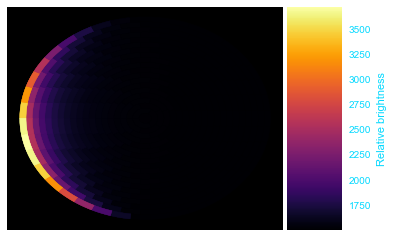

In [14]:
t = spider_params.t0

sp.plot_planet(spider_params,t)
plt.show()

And at secondary:

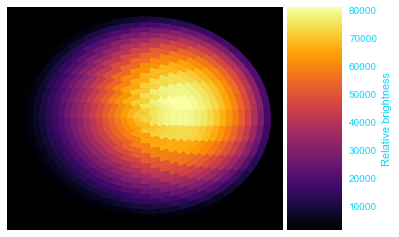

In [23]:
t = spider_params.t0 + spider_params.per/2.0

sp.plot_planet(spider_params,t)
plt.show()

For some models, such as the zhang model, temperature and brightness are calculated. Both can be plotted

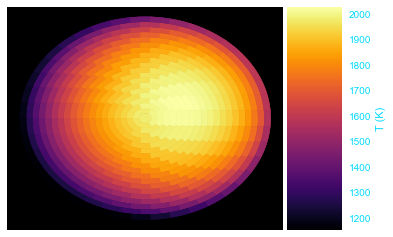

In [24]:
sp.plot_planet(spider_params,t,temp_map=True)
plt.show()

Since the brightness will approximately be proportional to the 4th power of temperature, the contrast on the hotspot is lower in this instance.

It is also possible to create a system plot, to see the planet in context

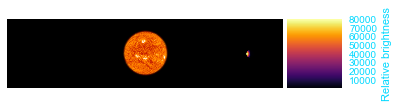

In [19]:
t = spider_params.t0 + spider_params.per/4.0

sp.plot_system(spider_params,t)
plt.show()

This image is to scale. It's easy to make some neat visualisations of the orbit by combining saved output from this function with something like mencoder.

NOTE: SPIDERMAN does **not** compute primary transits. To do this, you have to combine with a separate code, such as Batman (kriedberg et al 2015)

Now let's actually recover a lightcurve

In [ ]:
import numpy as np

t= spider_params.t0 + np.linspace(0, + spider_params.per,100)

lc = sp.lightcurve(t,spider_params)

print(lc)